In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import math

In [2]:
#Funciones Auxiliares
def sumaV(x,y):
    '''Suma 2 vectores dados'''
    a,b=x
    c,d=y
    return (a+c,b+d)
def multV(n,a):
    '''Multiplica un vector a por una constante n'''
    a1,a2 = a
    return (a1*n,a2*n)
def rota(vect, theta):
    '''Rota un vector en un ángulo en Theta grados'''
    ang = float((theta/180.0)*math.pi)
    (x,y) = vect
    vr = ((math.cos(ang)*x)-(math.sin(ang)*y), (math.sin(ang)*x)+(math.cos(ang)*y))
    return vr
def dist(a, b):
    a1, a2 = a
    b1, b2 = b
    return math.sqrt(((b1-a1)**2)+((b2-a2)**2))

In [3]:
class Atomo:
    '''Clase que define un atomo en el sistema'''
    def __init__(self, pos, color='black'):
        '''Inicializa el objeto Atomo usando como entradas su posición (x,y) pos y su color caracteristico color'''
        self.pos = pos
        self.color = color
        self.enlaces = []

    def printAtomo(self, r, axs):
        '''Imprime un Atomo en un Patch en el axs señalado'''
        axs.add_patch(plt.Circle((self.pos), r , color=self.color))

    def setEnlace(self, atm):
        '''Enlaza 2 Atomos'''
        self.enlaces.append(atm)
        atm.enlaces.append(self)
        return 1


In [4]:
class Malla:
    '''Define una malla bidimencional formada por 2 vectores dados
Variables de Malla:
   u -> vector constructor u.
   v -> vector constructor v.
   theta -> ángulo de rotación de la malla.
   red -> lista con las pociciones de los puntos que caracterizan a cada celda de la malla.
   atms -> lista de todos los átomos en la malla
   enls -> lista de los enlaces entre átomos en la malla
   aPos -> lista auxiliar con las posiciones de todos los átomos.
   aColor -> lista auxiliar con los colores de todos los átomos.
'''
    def __init__(self, u, v, theta = 0.0):
        if theta==0.0:
            self.u = u
            self.v = v
        else:
            self.u = rota(u,theta)
            self.v = rota(v,theta)
        self.theta = theta
        self.red = []
        self.atms = []
        self.enls = []
        self.aPos, self.aCol = [], []

    def printWeb(self, axs):
        '''Imprime la red de simetrias de la malla'''
        if self.red == []: 
            print("Aun no se ha creado una red, use el método creaNM(n,m)")
            return
        lis = np.array(self.red)
        xs, ys = lis[:,0], lis[:,1]        
        mx = np.amax(xs)
        my = np.amax(ys)
        axs.set(xlim=(-mx,mx), ylim = (-my,my))
        '''plt.scatter(xs, ys,s=10)'''
        ln = []
        for p in self.red:
            ln.append([p,sumaV(p,self.u)])
            ln.append([p,sumaV(p,self.v)])
        lc = mc.LineCollection(np.array(ln), colors='darkgrey', linewidths=(0.5))
        axs.add_collection(lc)
        return ln
    
    def creaNM(self, n, m):
        '''Crea una red que se repite n veces en el vector u y m en el vector v en ambas direcciones'''
        red = []
        for i in range((2*n)+1):
            a = i-n
            for j in range((2*m)+1):
                b = j-m
                p = sumaV((multV(a,self.u)), (multV(b,self.v)))
                self.red.append(p)
        return self.red

    def creaAtomos(self, nAtms, colors=['blue','blue']):
        '''Crea la lista de los Átomos que están en la malla. La variable nAtms indica el numero de atomos en cada celda de la malla.
Si la variable nAtms es 1 entonces se forma una estructura de cuadrada.
Si la variable nAtms es 2 entonces se forma una estructura de exagonal.'''
        if nAtms == 1:#Crea una red de atomos con patrones cuadrados
            u = self.u#multV((1/2),self.u)
            v = self.v#multV((1/2),self.v)
            for p in self.red:
                p1 = p
                self.atms.append(Atomo(p1,colors[0]))
                self.aPos.append(p1)
                self.aCol.append(colors[0])
                p2 = sumaV(p1, self.u)
                p3 = sumaV(p1, self.v)
                self.enls.append([p1,p2])
                self.enls.append([p1,p3])
            return 1
        if nAtms == 2:#Crea una red de atomos con patrones exagonales 
            u = multV((1/3),self.u)
            v = multV((1/3),self.v)
            for p in self.red:
                p1 = sumaV(p,sumaV(u,v))
                self.atms.append(Atomo(p,colors[0]))
                self.aPos.append(p)
                self.aCol.append(colors[0])
                self.atms.append(Atomo(p1,colors[1]))
                self.aPos.append(p1)
                self.aCol.append(colors[1])
                p3 = sumaV(p,self.u)
                p4 = sumaV(p,self.v)
                self.enls.append([p,p1])
                self.enls.append([p1,p3])
                self.enls.append([p1,p4])
            return 1
        self.atms, self.enls = [], []
        self.aPos, self.aCol = [], []
        return 0
    
    def crea(self, n, m, nAtms, colors=['blue','blue']):
        '''Crea una red n*m y sus atomos'''
        self.creaNM(n,m)
        self.creaAtomos(nAtms, colors)


In [5]:
def muestra(mallas, t = 0.5, name = '',mm = None, ax=None):
    '''Impime en pantalla la lista de Mallas dadas, puede señalarse un grosor de dibujo t y un nombre name
De tener nombre se creará una imagén con dicho nombre'''
    if(ax is None):
        fig, axs = plt.subplots()
    else: axs = ax
    atms, enls, col = [], [], []
    i = 0
    for m in mallas:
        i+=1
        print("Malla",i,":",len(m.aPos),"atomos,",len(m.enls),"enlaces")
        atms = atms+m.aPos
        col = col+m.aCol
        enls = enls+m.enls
    print("\tTotal:",len(atms),"atomos,",len(enls),"enlaces")
    lis = np.array(atms)
    xs, ys = lis[:,0], lis[:,1]
    axs.scatter(xs,ys, color=col,s=t)
    lc = mc.LineCollection(np.array(enls), colors='black', linewidths=(t/10))
    axs.add_collection(lc)
    if (mm is not None):
        mm.printWeb(axs)
    #axs.axes.xaxis.set_visible(False)
    #axs.axes.yaxis.set_visible(False)
    axs.autoscale_view(tight=False)
    if name!='':
        plt.savefig(name,dpi=900, bbox_inches='tight')
    plt.show()
    axs.cla()
    plt.clf()
    plt.close()
    return 1

In [6]:
def busca(vectU,vectV,factor,rango,eps):
    res = []
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    for i in range(60*factor):
        th = (i+(0*factor))/factor
        ang = math.radians(th)
        cos = math.cos(ang)
        sen = math.sin(ang)
        ru, rv = rota(vectU,th), rota(vectV,th)
        for a in range(rango):
            for b in range(rango):
                if (th%60!=0):
                    if (a!=0)and(b!=0):
                        c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                        d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                        r1 = sumaV(multV(a,vectU),multV(b,vectV))
                        r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                        #(e1,e2) = sumaV(r1,multV(-1,r2))
                        #err = max(abs(e1),abs(e2))
                        err = dist(r1,r2)
                        if err<eps:
                            res.append([a,b,round(c),round(d),round(th%60,3),err])
                            print("(a,b)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",round(th%60,3),"err:",err)
    return res

                            
def buscaTh(vectU,vectV, a, b, step=2, eps=0.01, show=True):
    res = []
    rmin = None
    epsm = eps
    factor = 10**step
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    for i in range(180*factor):
        th = float((i/factor)-60)
        ang = math.radians(th)
        cos = math.cos(ang)
        sen = math.sin(ang)
        ru, rv = rota(vectU,th), rota(vectV,th)
        if(th%60!=0):
            if (a!=0)and(b!=0):
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                err = dist(r1,r2)
                if err<eps:
                    res.append([a,b,round(c),round(d),round(th,step),err])
                    if err<epsm:
                        print("nuevo mejor=",th)
                        epsm = err
                        rmin = [a,b,round(c),round(d),round(th,step),err]
                    if show:
                        print("(a,b)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",round(th,step),"err:",err)
    return res, rmin
                            
def buscaMN(vectU,vectV, th, rang=15, eps=0.01, show=True):
    epsm = eps
    f1, f2 = 0, 0
    res = []
    rmin = [0,0,0,0,0.0,0.0,(0.0,0.0)]
    rmin2 = [0,0,0,0,0.0,0.0,(0.0,0.0)]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(vectU,th), rota(vectV,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    print("Busqueda en a pos")
    for a in range(rang):
        for b in range(rang):
            if (a!=0)and(b!=0):
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                err = dist(r1,r2)
                if err<eps:
                    if (round(c)!=0)and(round(d)!=0):
                        (f1,f2) = (c/round(c)),(d/round(d))
                    res.append([a,b,round(c),round(d),th,err,(f1,f2)])
                    if err<epsm:
                        print("nuevo mejor=",(a,b),(c,d))
                        epsm = err
                        rmin = [a,b,round(c),round(d),th,err,(f1,f2)]
                    if show:
                        print("(n,m)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",th,"err:",err)
    print("Busqueda en a neg")
    epsm = eps
    for i in range(rang):
        a = i*(-1)
        for b in range(rang):
            if (a!=0)and(b!=0):
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                err = dist(r1,r2)
                if err<eps:
                    if (round(c)!=0)and(round(d)!=0):
                        (f1,f2) = (c/round(c)),(d/round(d))
                    res.append([a,b,round(c),round(d),th,err,(f1,f2)])
                    if err<epsm:
                        print("nuevo mejor=",(a,b),(c,d))
                        epsm = err
                        rmin2 = [a,b,round(c),round(d),th,err,(f1,f2)]
                    if show:
                        print("(n,m)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",th,"err:",err)
    return res, rmin, rmin2
    
def nvm(u,v,a,b,ang=60):
    mu = sumaV(multV(a,u),multV(b,v))
    mv = rota(mu,ang)
    return mu, mv

def sub(u, v, n, m):
    p1 = sumaV(multV(m,u),multV(n,v))
    p2 = sumaV(multV(-n,u),multV(n+m,v))
    return p1, p2

In [7]:
l = 1
h = l*math.sqrt(3)
u, v = (h,-l),(h,l)
th = 9.43
malla = Malla(u, v)
malla.crea(21,21,2,colors=['red','darkgreen']);
mallaR = Malla(u, v, theta=th)
mallaR.crea(21,21,2,colors=['darkred','darkblue']);

In [ ]:
muestra([malla],name='malla0.png')

In [ ]:
muestra([mallaR],name='malla0R.png')

In [ ]:
#Mostramos el empalme de la primer red con su rotada
nombre = "ejemplo(th="+str(th)+").png"
muestra([malla,mallaR],t=0.3,name=nombre)

In [ ]:
th2 = 2*th
mallaR2 = Malla(u, v, theta=th2)
mallaR2.crea(21,21,2,colors=['yellow','grey']);
muestra([mallaR2],t=0.3,name='malla0r2')

In [ ]:
nombre = "ejemplo2(th="+str(th)+").png"
muestra([mallaR,mallaR2],t=0.3,name=nombre)

In [ ]:
nombre = "ejemplo2(th="+str(th)+",th2="+str(th2)+").png"
muestra([malla,mallaR,mallaR2],t=0.3,name=nombre)

In [ ]:
u2,v2=nvm(u,v,3,4)
u2, v2
redM1 = Malla(u2,v2)
redM1.crea(6,4,1,colors=['black','black'])
muestra([malla,mallaR],t=0.3,name='ejemplo1cmalla.png',mm=redM1)

In [ ]:
u2,v2=nvm(u,v,3,4)
u2, v2
redM2 = Malla(u2,v2,theta=th)
redM2.crea(6,4,1,colors=['black','black'])
muestra([mallaR,mallaR2],t=0.3,name='ejemplo2cmalla.png',mm=redM2)

In [ ]:
u3,v3=nvm(u2,v2,3,4)
redM3 = Malla(u3,v3)
redM3.creaNM(2,1)
muestra([malla,mallaR,mallaR2,redM1,redM2],t=0.3,name='ejemplo3cmalla.png',mm=redM3)

In [ ]:
muestra([redM1,redM2],t=0.3,name='ejemplo4cmalla.png',mm=redM3)

In [ ]:
l = 1
h = l*math.sqrt(3)
u, v = (h,-l), (h,l)
resultados = busca(u,v,100,40,0.00001);

In [ ]:
[a,b,c,d,th,er]=resultados[2]
l = 1
h = l*math.sqrt(3)
u, v = (h,-l),(h,l)
m1 = Malla(u, v)
m2 = Malla(u, v, theta=th)
m1.crea(21,21,2,colors=['darkred','grey'])
m2.crea(21,21,2,colors=['darkblue','darkgreen'])
u2, v2 = sub(u,v,b,a)#nvm(u,v,a,b,ang=th)
redM1 = Malla(u2,v2)
redM1.crea(6,6,1,colors=['black','black'])
u1=sumaV(multV(a,u),multV(b,v))
v1=rota(u1,60)
print((u1,v1),(u2,v2))

In [ ]:
muestra([m1],name='cosa2',mm=redM1)

In [ ]:
u3, v3 = nvm(u,v,a,b)
redM2 = Malla(u3,v3)
redM2.crea(6,6,1,colors=['blue','black'])
muestra([redM1],name='cosa2',mm=redM2)

In [ ]:
l = 1
h = l*math.sqrt(3)
a,b = 12,13
th = 2.64
(u1,u2) = u
(v1,v2) = v
ax1 = (u2*v1)-(u1*v2)
ax2 = (u1*v1)+(u2*v2)
ax3 = (v1*v1)+(v2*v2)
ax3 = (u1*u1)+(u2*u2)
u, v = (h,-l), (h,l)
ang = math.radians(th)
cos = math.cos(ang)
sen = math.sin(ang)
ru, rv = rota(u,th), rota(v,th)
c = (a*(ax1*cos-ax2*sen) - b*(ax3*sen))/ax1
d = (b*(ax1*cos+ax2*sen) + a*(ax3*sen))/ax1
c,d = round(c),round(d)
r1=sumaV(multV(a,u),multV(b,v))
r2=sumaV(multV(c,ru),multV(d,rv))
r3=sumaV(r1,multV(-1,r2))
print(r1,r2,"Dif=",r3)
print(dist(r1,r2))

In [ ]:
l = 1
h = l*math.sqrt(3)
a,b = 2,3
th = 13.17
(u1,u2) = u
(v1,v2) = v
ax1 = (u2*v1)-(u1*v2)
ax2 = (u1*v1)+(u2*v2)
ax3 = (v1*v1)+(v2*v2)
ax3 = (u1*u1)+(u2*u2)
u, v = (h,-l), (h,l)
ang = math.radians(th)
cos = math.cos(ang)
sen = math.sin(ang)
ru, rv = rota(u,th), rota(v,th)
c = (a*(ax1*cos-ax2*sen) - b*(ax3*sen))/ax1
d = (b*(ax1*cos+ax2*sen) + a*(ax3*sen))/ax1
c,d = round(c),round(d)
r1=sumaV(multV(a,u),multV(b,v))
r2=sumaV(multV(c,ru),multV(d,rv))
r3=sumaV(r1,multV(-1,r2))
print(r1,r2,"Dif=",r3)
print(dist(r1,r2))

In [ ]:
vs = multV(2,v)
u1, u2 = u
v1, v2 = vs
ang=((u1*v1)+(u2*v2))/(dist((0,0),u)*dist((0,0),vs))
(math.acos(ang))*180/math.pi

In [68]:
m, n = 1,2
r, rm = buscaTh(u,v,n,m,step=4,eps=0.001, show=False)

if len(r)!=0:
    print("Rotación optima para (m,n)=",(n,m),":",rm[4]%60,"\n\t Err=",rm[5])
else:
    print("sin resultados")

nuevo mejor= -59.9999
nuevo mejor= -21.7868
Rotación optima para (m,n)= (2, 1) : 38.2132 
	 Err= 9.883498602822555e-07


In [40]:
l = 1
h = l*math.sqrt(3)
u, v = (2.4400000572,0.0000000000),(-1.2200000286,2.1131020348)
ang = 38.2
r, rm, rm2 = buscaMN(u,v,ang, eps=1,show=False)
print("",rm,"\n",rm2)

Busqueda en a pos
nuevo mejor= (1, 1) (1.1428951467141173, 0.428818639651547)
nuevo mejor= (1, 2) (1.8569716537766876, 1.571713786350804)
nuevo mejor= (1, 4) (3.2851246679018287, 3.857504079749318)
nuevo mejor= (1, 5) (3.9992011749643988, 5.000399226448574)
nuevo mejor= (2, 3) (2.9998668004908047, 2.000532426002351)
Busqueda en a neg
nuevo mejor= (-1, 1) (0.2852578674110236, 1.856971653746967)
nuevo mejor= (-1, 2) (0.9993343744735941, 2.999866800446224)
 [2, 3, 3, 2, 38.2, 0.0014884769117700966, (0.9999556001636015, 1.0002662130011755)] 
 [-1, 2, 1, 3, 38.2, 0.0014884769117704478, (0.9993343744735941, 0.9999556001487413)]


In [9]:
(f1, f2) = rm[6]
p1 = sumaV(multV(rm[0],u),multV(rm[1],v))
ru, rv = rota(u,ang), rota(v,ang)
p2 = sumaV(multV(rm[2],ru),multV(rm[3],rv))
print(ru,rv)
print(rm[0],"u+",rm[1],"v to",rm[2],"ru+",rm[3],"rv",dist(p1,p2))
ru, rv = multV(f1,ru), multV(f2,rv)
print(ru,rv)
p2 = sumaV(multV(rm[2],ru),multV(rm[3],rv))
print(dist(p1,p2), "%tension=" , ((f1-1)*100,(f2-1)*100))

(1.9795524618155778, 0.28525786741102344) (0.7427356711004695, 1.856971653761827)
2 u+ 1 v to 3 ru+ -1 rv 0.001220063036527316
(1.9794645699937883, 0.285245202006024) (0.7422412872747334, 1.8557356060180719)
8.95090418262362e-16 %tension= (-0.004439984465420821, -0.0665625531359737)


Malla 1 : 30 atomos, 45 enlaces
	Total: 30 atomos, 45 enlaces


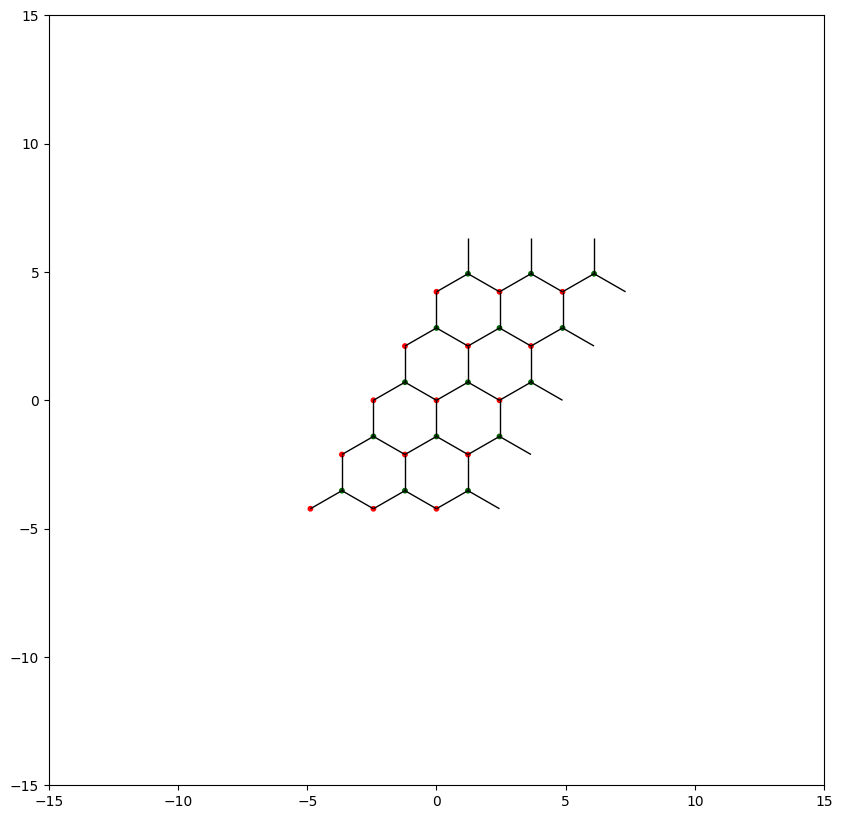

1

In [45]:
u, v = (2.4400000572,0.0000000000),(2.4400000572-1.2200000286,2.1131020348)
fig, axs = plt.subplots()
axs.set_xlim(-15, 15)
axs.set_ylim(-15, 15)
malla = Malla(u, v)
malla.crea(1,2,2,colors=['red','darkgreen']);
muestra([malla],ax = axs,t=10)

In [73]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

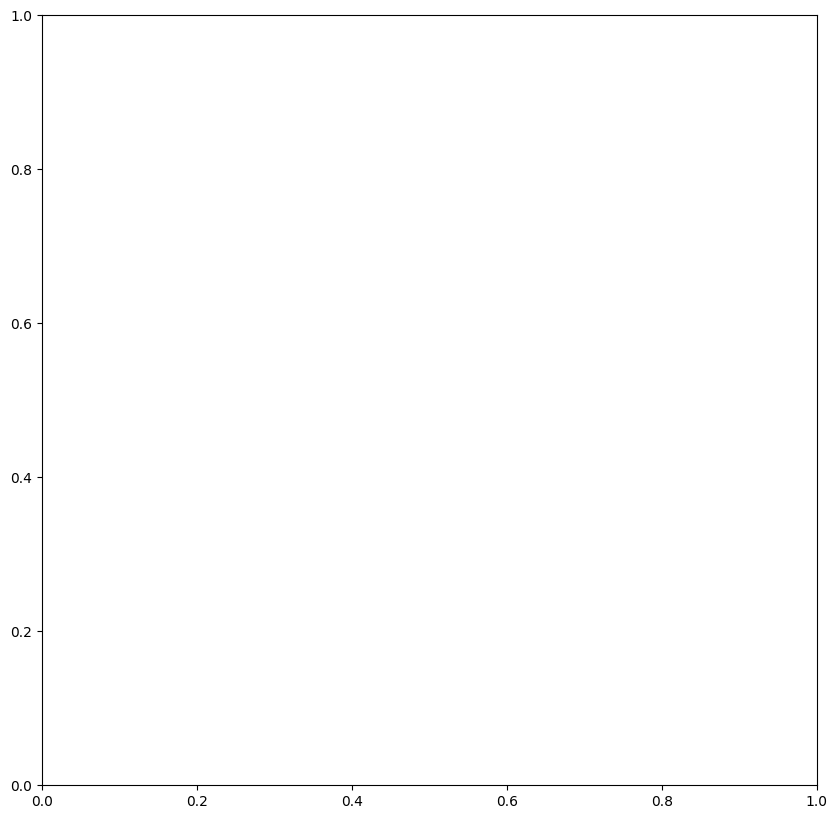

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots()

In [33]:
x=[('a',(1,2)),('b',(2,4)),('c',(3,8)),('d',(4,0))]
for s,t in x:
    n,m=t
    print(s,str(n+1))

a 2
b 3
c 4
d 5


In [10]:
min((1,2),(4,6),(0,5),(3,0),(-1,10))

(-1, 10)

In [ ]:
ingresaAtms(m, m0):
    pO = len(m.atms)
    for i in len(m0.atms):
        m.atms.append([])
    idu1, idu2=True, True
    while(idu1 or idu2):

isitin(m,cent, mu, mv):
    res = []
    inUnit = False
    (u1,u2) = m.u
    (v1,v2) = m.v
    (p1,p2) = mu
    (q1,q2) = mv
    eq0 = (p2*q1)-(p1*q2)
    eq1 = (q1*u2)-(q2*u1)
    eq2 = (q1*v2)-(q2*v1)
    eq3 = (p2*u1)-(p1*u2)
    eq4 = (p2*v1)-(p1*v2)
    for c in m.atms:
        nc=[]
        for (pos,enl) in c:
            (x,y) = sumaV(cent,pos)
            nx = (eq1*x+eq2*y)/eq0
            ny = (eq3*x+eq4*y)/eq0
            nPos=(nx,ny)
            if (nx<1 and nx>0) and (ny<1 and ny>0):
                nEnl = []
                for e in enl:
                    (x1,y1) = sumaV(cent,e[0])
                    (x2,y2) = sumaV(cent,e[1])
                    o = ((eq1*x1+eq2*y1)/eq0,(eq3*x1+eq4*y1)/eq0)
                    f = ((eq1*x2+eq2*y2)/eq0,(eq3*x2+eq4*y2)/eq0)
                    nEnl.append([o,f])
                nc.append((nPos,nEnl))
                inUnit = True 
        res.append(nc)
    return res, inUnit